<a href="https://colab.research.google.com/github/JsantosAn/Desafio-FrontEnd-2021/blob/main/TrabalhoIAFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from numpy.random import randint
from numpy.random import rand
from random import randrange
import numpy.random as rn
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time
from tqdm import tqdm


class MLPlayer(object):
    def __init__(self, peso, bias):
        self.weights =  peso
        self.bias =  bias
    def forward_propagate(self, inputs):
        net_inputs = np.dot(inputs, self.weights)# + self.bias
        activations = self.TanH(net_inputs)
        return activations
    def TanH(self,x):
        return np.tanh(x)
    def _mse(self, target, output):
        MSE = np.square(np.subtract(target,output)).mean()   
        return math.sqrt(MSE)
def PesosBias(oculta,x_teste,pop):
  b2 = []
  p = np.array_split(pop,3)
  for x in range(len(p)):
    if (len(p[x]) > oculta):
      r = randrange(0, len(p[x]))
      b2 = p[x][r]
      p[x] =  np.delete(p[x], r)  
  p1 = p[2].reshape(1,oculta)
  b1 = p[0]
  p2 = p[1].reshape(oculta,1)
  hidden = MLPlayer(p1, b1)
  output = MLPlayer(p2, b2)
  hidden_outputs = hidden.forward_propagate(x_teste)
  y = output.forward_propagate(hidden_outputs)
  return y
def _mse(target, output):
  MSE = np.square(np.subtract(target,output)).mean()   
  return math.sqrt(MSE)

In [45]:
X_treino = np.arange(-np.pi, np.pi, 0.2).reshape(32, 1)
y_treino = np.sin(X_treino)
y_treino += np.random.normal(loc=0,scale=0.1, size=y_treino.shape).reshape(32, 1)
X_teste = np.arange(0, 2*np.pi, 0.2).reshape(32, 1)
y_teste  = np.sin(X_teste)
y_teste += np.random.normal(loc=0,scale=0.1, size=X_teste.shape).reshape(32, 1)

In [ ]:
X_treino

array([[-3.14159265],
       [-2.94159265],
       [-2.74159265],
       [-2.54159265],
       [-2.34159265],
       [-2.14159265],
       [-1.94159265],
       [-1.74159265],
       [-1.54159265],
       [-1.34159265],
       [-1.14159265],
       [-0.94159265],
       [-0.74159265],
       [-0.54159265],
       [-0.34159265],
       [-0.14159265],
       [ 0.05840735],
       [ 0.25840735],
       [ 0.45840735],
       [ 0.65840735],
       [ 0.85840735],
       [ 1.05840735],
       [ 1.25840735],
       [ 1.45840735],
       [ 1.65840735],
       [ 1.85840735],
       [ 2.05840735],
       [ 2.25840735],
       [ 2.45840735],
       [ 2.65840735],
       [ 2.85840735],
       [ 3.05840735]])

In [ ]:
y_treino

array([[-0.03475639],
       [-0.24178212],
       [-0.63385916],
       [-0.71262987],
       [-0.89308734],
       [-0.73854816],
       [-1.02661929],
       [-0.91870561],
       [-1.04518268],
       [-0.88130211],
       [-1.04317602],
       [-0.73703092],
       [-0.64192247],
       [-0.55441383],
       [-0.36048311],
       [-0.07227459],
       [ 0.04452878],
       [ 0.23044173],
       [ 0.52014276],
       [ 0.80097371],
       [ 0.67631919],
       [ 0.69093787],
       [ 1.02344936],
       [ 0.93912337],
       [ 0.93613079],
       [ 0.96534892],
       [ 1.01992142],
       [ 0.71580648],
       [ 0.59804   ],
       [ 0.5208398 ],
       [ 0.40714601],
       [ 0.02773856]])

In [ ]:
X_teste

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8],
       [2. ],
       [2.2],
       [2.4],
       [2.6],
       [2.8],
       [3. ],
       [3.2],
       [3.4],
       [3.6],
       [3.8],
       [4. ],
       [4.2],
       [4.4],
       [4.6],
       [4.8],
       [5. ],
       [5.2],
       [5.4],
       [5.6],
       [5.8],
       [6. ],
       [6.2]])

In [ ]:
y_teste

array([[-0.05286308],
       [-0.02427933],
       [ 0.45556456],
       [ 0.51019517],
       [ 0.72381719],
       [ 0.73617116],
       [ 0.74406654],
       [ 1.02564226],
       [ 1.0219724 ],
       [ 0.90193674],
       [ 0.86715692],
       [ 0.84941019],
       [ 0.71847776],
       [ 0.58020355],
       [ 0.31914712],
       [ 0.25332791],
       [-0.0767483 ],
       [-0.25690554],
       [-0.53565771],
       [-0.55110318],
       [-0.78071154],
       [-0.85860843],
       [-1.00759433],
       [-1.06662286],
       [-0.98274734],
       [-0.94202338],
       [-0.74930147],
       [-0.93452147],
       [-0.69015297],
       [-0.49641874],
       [-0.29760705],
       [-0.15399875]])

In [46]:
def plot(progresso,y_pred_treino,y_pred,x_teste,c,fo):
  plt.figure(figsize=(10, 5))
  plt.plot(progresso,label=1100)
  plt.xlabel('Iterações')
  plt.ylabel('FO')
  plt.title(f"FO: {fo}, Camada: {c}")
  plt.show()
  
  plt.figure(figsize=(10, 5))
  plt.plot(X_teste, y_teste ,'o', label='Teste')
  plt.plot(X_treino, y_treino,'o', label='Treino')
  plt.plot(x_teste, y_pred, 'b-o',label='Predito')
  plt.title(f"FO: {fo}, Camada: {c}")
  legend = plt.legend(loc ="upper right")


  plt.show()


In [47]:
class SA(object):
  def __init__(self,oculta,saida,x_teste,y_teste,objective, n_iter,temperature,search_space,desv,alpha):
        self.oculta =  oculta
        self.saida =  saida
        self.x_teste =  x_teste
        self.y_teste =  y_teste
        self.objective =  objective
        self.n_iter =  n_iter
        self.temperature =  temperature
        self.search_space =  search_space
        self.desv = desv
        self.alpha = alpha

  def gera_vizinhos(self,solucao, desvio_padrao, n_vizinhos, espaco_busca):
      vizinhos = []
      mut = random.uniform(0,1)
      for _ in range(n_vizinhos):
        if mut <= 0.5:
          vizinho = solucao + np.random.normal(loc=0, scale=desvio_padrao)
        else:
          vizinho = np.random.uniform(-5.0, 5.0)

        while vizinho < espaco_busca[0] or vizinho > espaco_busca[1]:
              vizinho = solucao + np.random.normal(loc=0, scale=desvio_padrao)
        vizinhos.append(vizinho)
      return vizinhos

  def Simulate_A(self):
    tamanho =  self.oculta * 3
    solucao = 10 * np.random.random_sample((tamanho+self.saida))-5
    progresso = []
    temperatures = [self.temperature]

    pb = PesosBias(self.oculta,self.x_teste,solucao)
    valor_funcao_objetivo = self.objective(pb,self.y_teste)
    for i in range(self.n_iter):
        rd = random.randint(0,len(solucao)-1)
        v = self.gera_vizinhos(solucao[rd], self.desv,1, self.search_space)
        vizinho = np.delete(solucao, rd)
        vizinho=np.insert(vizinho,rd,v)
        pb = PesosBias(self.oculta,self.x_teste,vizinho)
        fo_vizinho = self.objective(self.y_teste,pb)
        delta = fo_vizinho - valor_funcao_objetivo
        progresso.append(valor_funcao_objetivo)
        if delta < 0: 
            solucao = vizinho
            valor_funcao_objetivo = fo_vizinho
            y = pb
        else:  
          prob_aceitacao = np.exp((-delta) /  self.temperature)
          if np.random.random() < prob_aceitacao:
            solucao = vizinho
            valor_funcao_objetivo = fo_vizinho
            y = pb

          self.temperature *= self.alpha
          temperatures.append(self.temperature)      
    #print(f"FO: {valor_funcao_objetivo}")
    return progresso,y,valor_funcao_objetivo,solucao

rsme treino: 0.17400423891921377, rsme teste: 0.3311046915615085


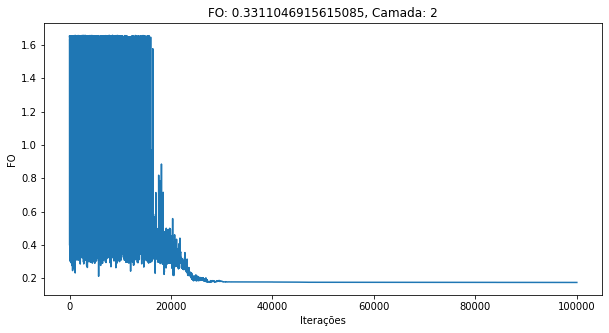

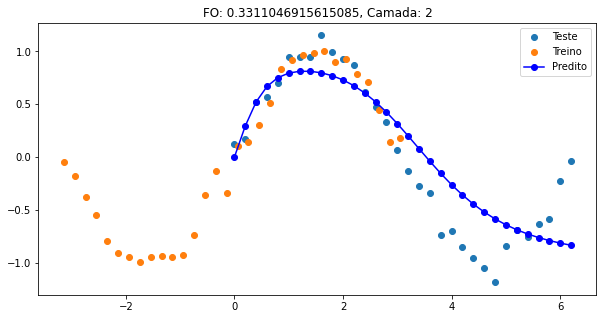

rsme treino: 0.1337025726590593, rsme teste: 0.30399416054571377


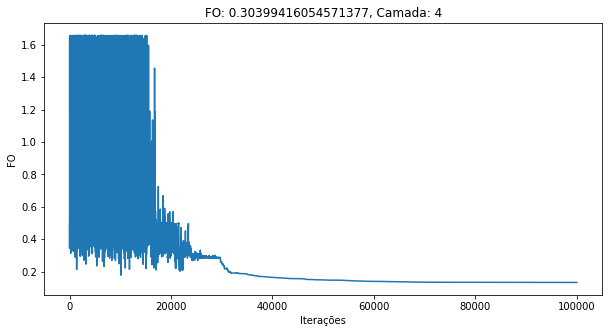

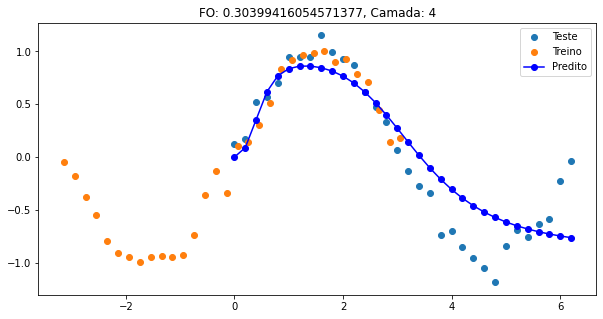

rsme treino: 0.11964743413231756, rsme teste: 0.31520106060833825


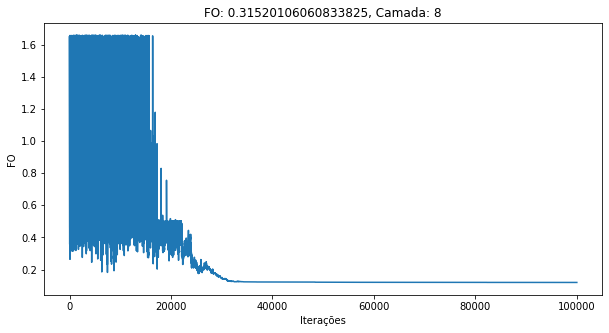

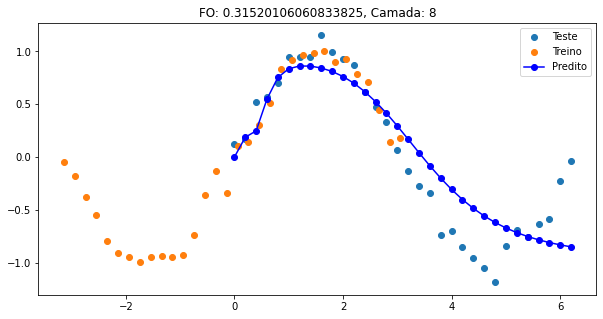

rsme treino: 0.061195532125434396, rsme teste: 0.2573980163866728


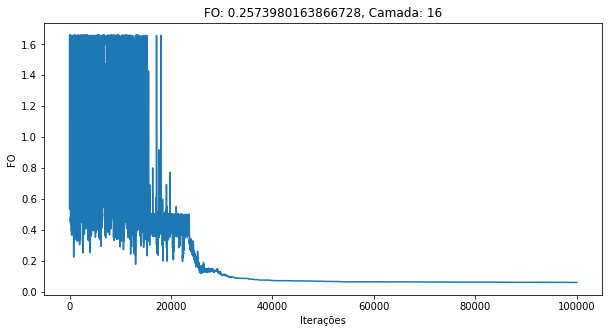

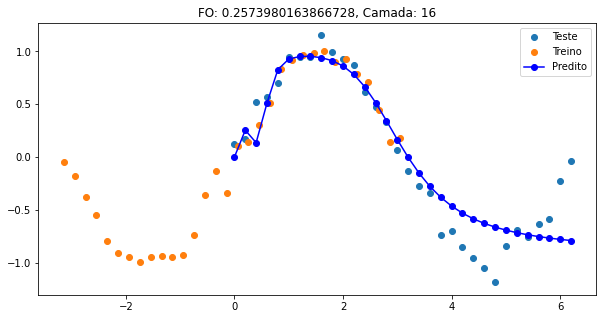

rsme treino: 0.06387065526709881, rsme teste: 0.2545785391698711


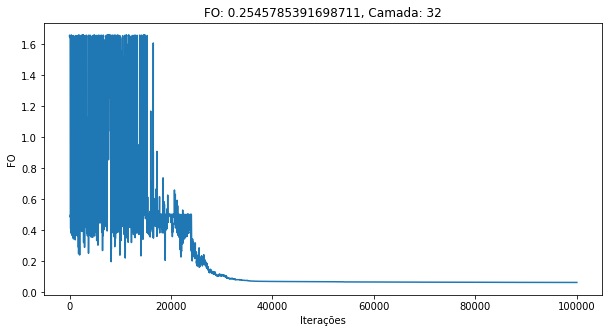

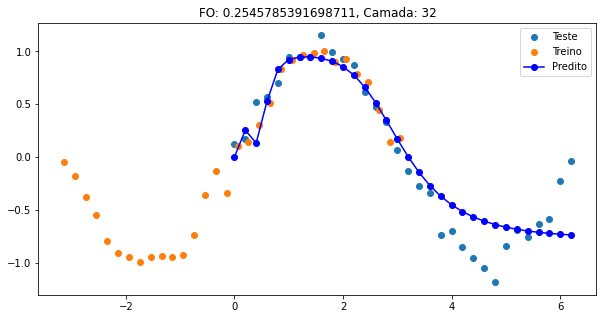

rsme treino: 0.057475251743989555, rsme teste: 0.25020563027878


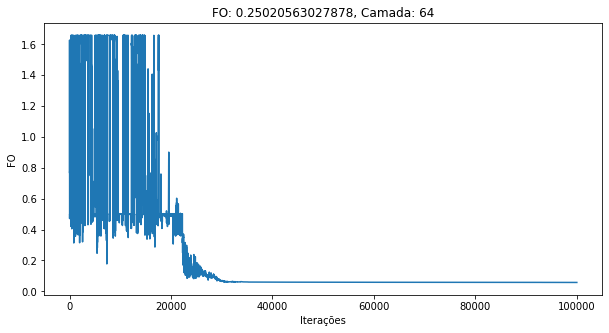

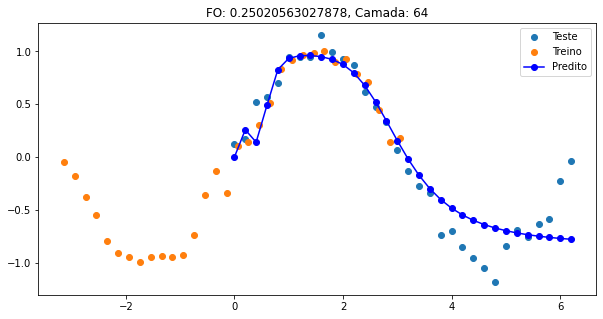

rsme treino: 0.0626460009172852, rsme teste: 0.2792782702603563


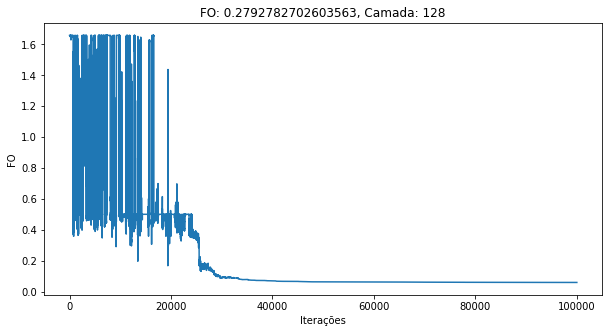

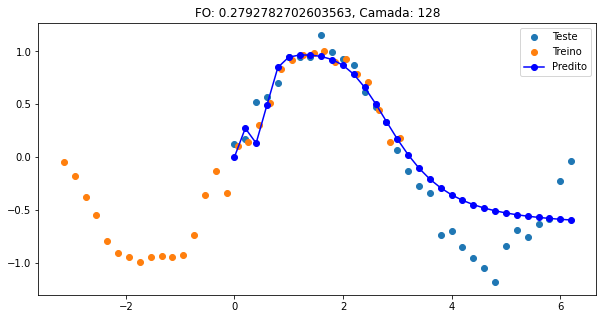

In [52]:
search_space = [-5, 5]
desv = 0.2
n_iter = 100000
n_pop = 50
temperature = 100
alpha = 0.9995
camadas = [ 2, 4, 8, 16, 32, 64 , 128 ]
for c in camadas:
  SimuA = SA(c,1,X_treino,y_treino,_mse, n_iter,temperature,search_space,desv,alpha)
  progresso, y_pred, fo,solucao= SimuA.Simulate_A()
  
  y = PesosBias(c,X_treino,solucao)
  y_pred = PesosBias(c,X_teste,solucao)
  r_treino= _mse(y_treino,y)
  r_teste= _mse(y_teste,y_pred)
  print(f"rsme treino: {r_treino}, rsme teste: {r_teste}")
  plot(progresso,y,y_pred,X_teste,c,r_teste)


In [49]:
class GA(object):
  def __init__(self,oculta,saida,x_treino,y_treino,objective, n_iter, n_pop, r_mut):
          self.oculta =  oculta
          self.saida =  saida
          self.x_treino =  x_treino
          self.y_treino =  y_treino
          self.objective =  objective
          self.n_iter =  n_iter
          self.n_pop =  n_pop
          self.r_mut =  r_mut

  def TournamentSelection(self,population, score):
    r1 = random.randint(0, len(score)-1)
    r2 = random.randint(0, len(score)-1)
    if score[r1] < score[r2]:
      p1 =  population[r1]
    else:
      p1 =  population[r2]
    return p1 
  def crossover(self,p1, p2):
    a = random.uniform(0,1)
    c1 = a*p1+(1-a)*p2
    c2 =  a*p2+(1-a)*p1 
    return c1, c2

  def mutation(self,bitstring, r_mut):
    for i in bitstring:
      for x in range(len(i)):
        mut = np.random.random()
        if mut < r_mut:
          i[x] += np.random.normal(loc=0, scale=1)
        else: 
          i[x] = np.random.uniform(-5.0, 5.0, 1)
    return bitstring

  def genetic_algorithm(self):
    tamanho =  self.oculta * 3
    progress = []
    pop = [10 * np.random.random_sample((tamanho+self.saida, self.saida)) - 5 for _ in range(n_pop)]
    best = 0
    mim_value = None
    best_y = PesosBias(self.oculta,self.x_treino,pop[0])
    best_eval = self.objective(self.y_treino,best_y)

    for gen in  tqdm (range (self.n_iter), desc="Loading..."):

      scores = []

      for i in range( self.n_pop):
        y = PesosBias(self.oculta,self.x_treino,pop[i])
        rmse = self.objective(self.y_treino,y)
        scores.append(rmse)
        if rmse < best_eval:
          best, best_eval = pop[i], rmse
          #print(">%d, %f" % (gen,rmse))
      children = list()
      children.append(best)
      for i in range(1, self.n_pop ,2):
        p1 = self.TournamentSelection(pop, scores)
        p2 = self.TournamentSelection(pop, scores)
        c1,c2 = self.crossover(p1, p2)
        if np.random.random() < 0.1:
          children.append(self.mutation(c1, self.r_mut))
        else:
          children.append(c1)

        if np.random.random() < 0.1:
          children.append(self.mutation(c2, self.r_mut))
        else:
          children.append(c2)
      
      progress.append(best_eval)
      pop = children
    return best,best_eval,progress

Loading...: 100%|██████████| 2000/2000 [00:07<00:00, 254.88it/s]


rsme treino: 0.1868678020623305, rsme teste: 0.4135614792199349


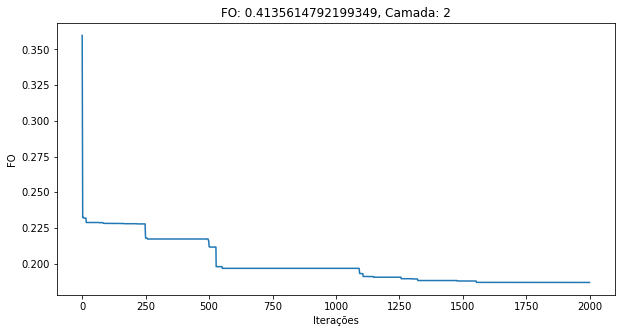

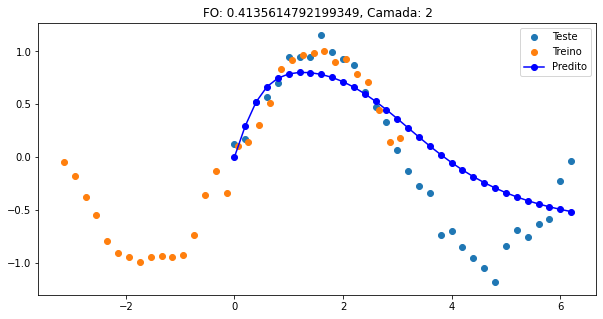

Loading...: 100%|██████████| 2000/2000 [00:08<00:00, 237.56it/s]


rsme treino: 0.17879417414640922, rsme teste: 0.33830775982195077


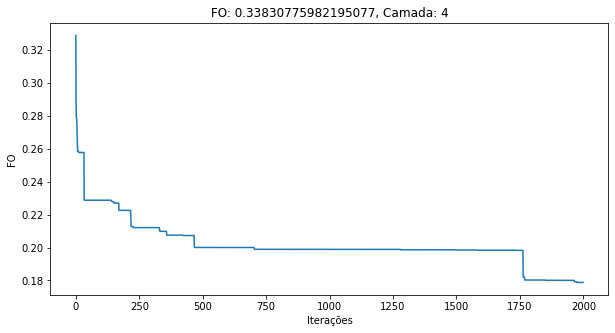

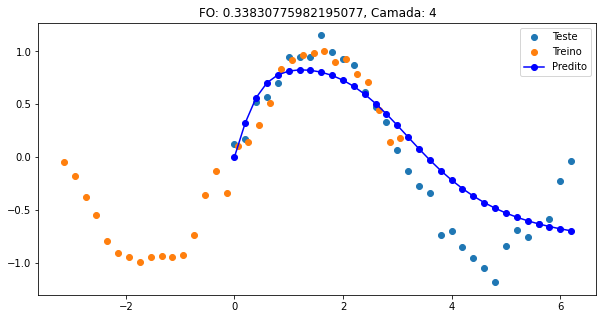

Loading...: 100%|██████████| 2000/2000 [00:09<00:00, 209.11it/s]


rsme treino: 0.18751171810180114, rsme teste: 0.5501488821838201


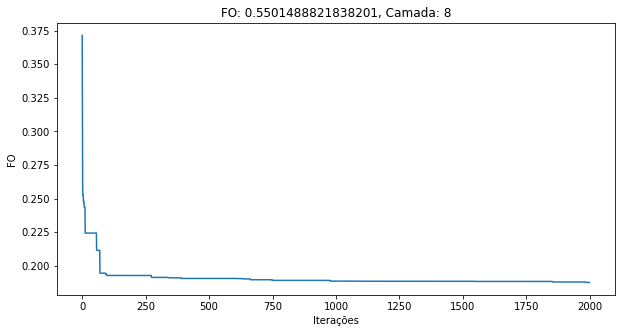

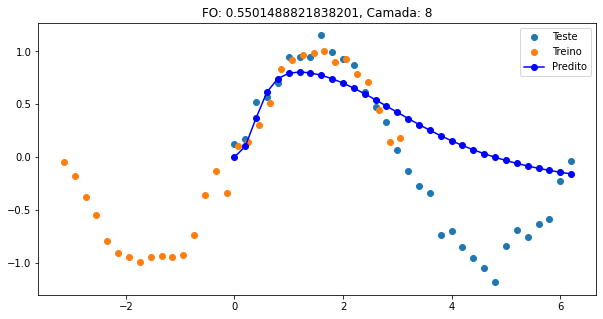

Loading...: 100%|██████████| 2000/2000 [00:11<00:00, 169.34it/s]


rsme treino: 0.12287842773719958, rsme teste: 0.3265409977361889


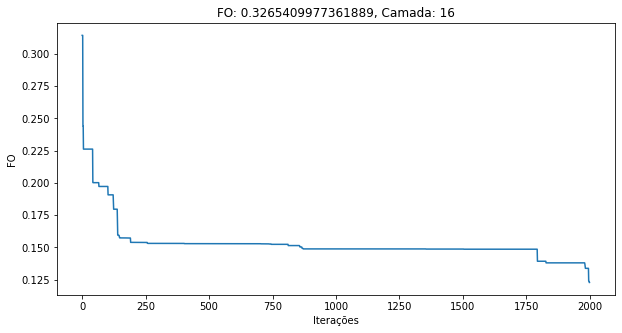

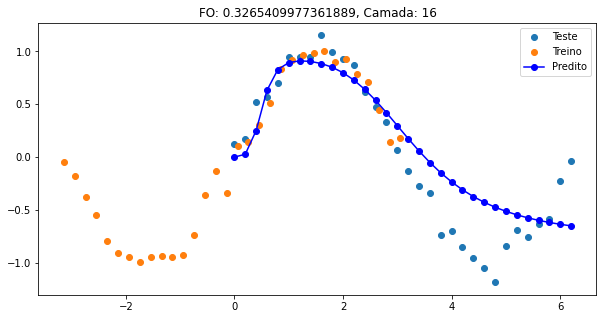

Loading...: 100%|██████████| 2000/2000 [00:16<00:00, 122.20it/s]


rsme treino: 0.1141937113874612, rsme teste: 0.27891145879561674


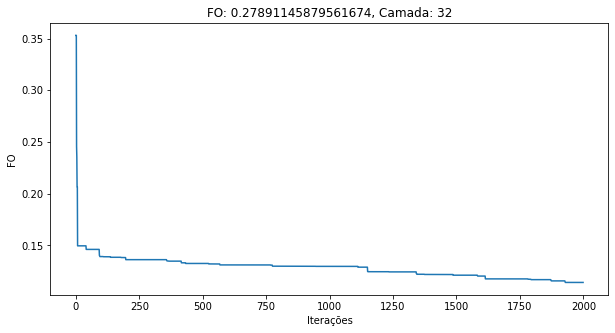

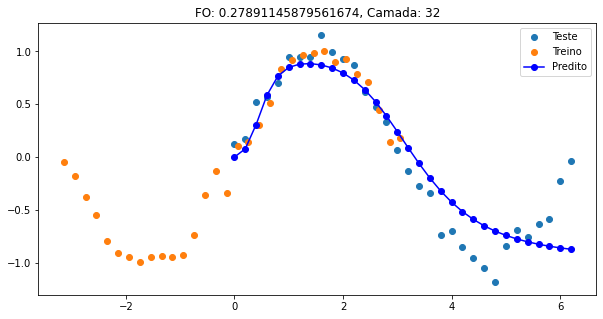

Loading...: 100%|██████████| 2000/2000 [00:25<00:00, 78.95it/s]


rsme treino: 0.10244007810359262, rsme teste: 0.25138669881135256


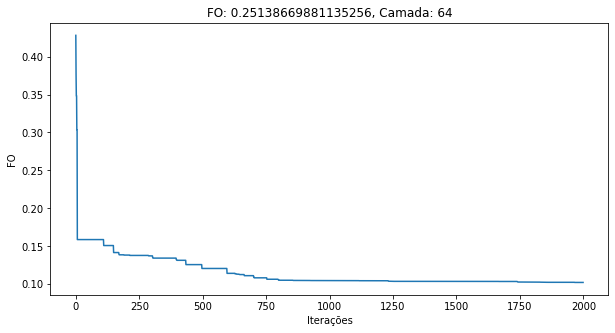

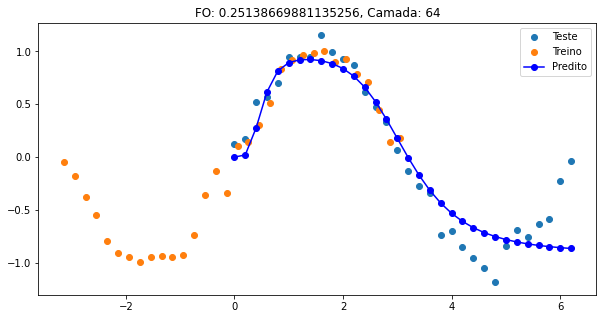

Loading...: 100%|██████████| 2000/2000 [00:44<00:00, 45.14it/s]


rsme treino: 0.08022625889631366, rsme teste: 0.24285498566107078


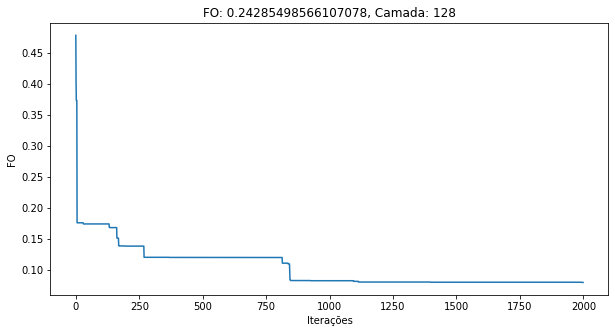

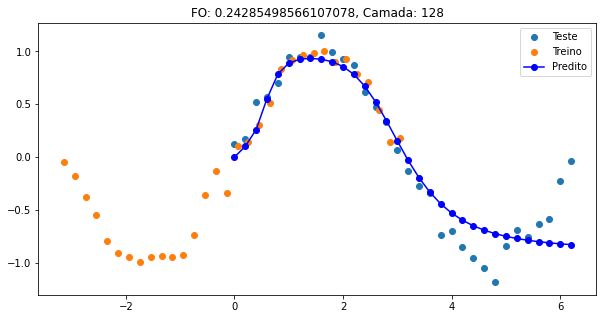

In [53]:
n_iter = 2000
n_pop = 50
r_cross = 0.3
r_mut =  0.3
camadas = [ 2, 4, 8, 16, 32, 64 , 128 ]
for c in camadas:
  Gen = GA (c,1,X_treino,y_treino,_mse,n_iter, n_pop, r_mut)
  best,best_eval,progress = Gen.genetic_algorithm()
  y_pred_treino = PesosBias(c,X_treino,best)
  y_pred = PesosBias(c,X_teste,best)
  r_treino= _mse(y_treino,y_pred_treino)
  r_teste= _mse(y_teste,y_pred)
  print(f"rsme treino: {r_treino}, rsme teste: {r_teste}")
  plot(progress,y_pred_treino,y_pred,X_teste,c,r_teste)
